In [16]:
import yt
import trident

import numpy as np 

from astropy.table import Table
import astropy.units as u
from astropy.constants import k_B, m_p

from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from get_refine_box import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'

discrete_cmap = mpl.colors.ListedColormap(['#565656','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','darkorange'])
%matplotlib notebook

In [27]:
# ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/natural/RD0012/RD0012")
ds = yt.load('/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/DD0946_wtf/DD0947')
# track_name = "/Users/molly/Dropbox/foggie/foggie/halo_tracks/nref11n_selfshield_15/halo_track_200kpc_nref10"
track_name = '/Users/molly/Dropbox/foggie/foggie/halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-12-12 10:17:47,799 Parameters: current_time              = 269.68547420286
yt : [INFO     ] 2018-12-12 10:17:47,801 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-12-12 10:17:47,805 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-12-12 10:17:47,807 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-12-12 10:17:47,810 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-12-12 10:17:47,811 Parameters: current_redshift          = 1.0307146357982
yt : [INFO     ] 2018-12-12 10:17:47,812 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-12-12 10:17:47,813 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-12-12 10:17:47,814 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :   0%|          | 0/6610 [00:00<?, ?it/s]

opening track: /Users/molly/Dropbox/foggie/foggie/halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9
inside get_refine_box 1.0307146357982
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.03136547042 0.491541 0.482167 0.503519 0.493541 0.484167 0.505519    9
get_halo_centers:  code_length code_velocity


Parsing Hierarchy : 100%|██████████| 6610/6610 [00:01<00:00, 5777.86it/s] 
yt : [INFO     ] 2018-12-12 10:17:49,525 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f


Located the main halo at: [0.49253368377685547, 0.4831418991088867, 0.5045270919799805] [-0.0012561028134138478 code_velocity, -0.0017326341039686378 code_velocity, 0.0006484916656728757 code_velocity]


[0.09349748 0.18699496 0.37398993] code_length


yt : [INFO     ] 2018-12-12 10:18:07,011 xlim = 0.503027 0.506027
yt : [INFO     ] 2018-12-12 10:18:07,012 ylim = 0.491034 0.494034
yt : [INFO     ] 2018-12-12 10:18:07,014 xlim = 0.503027 0.506027
yt : [INFO     ] 2018-12-12 10:18:07,016 ylim = 0.491034 0.494034
yt : [INFO     ] 2018-12-12 10:18:07,019 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



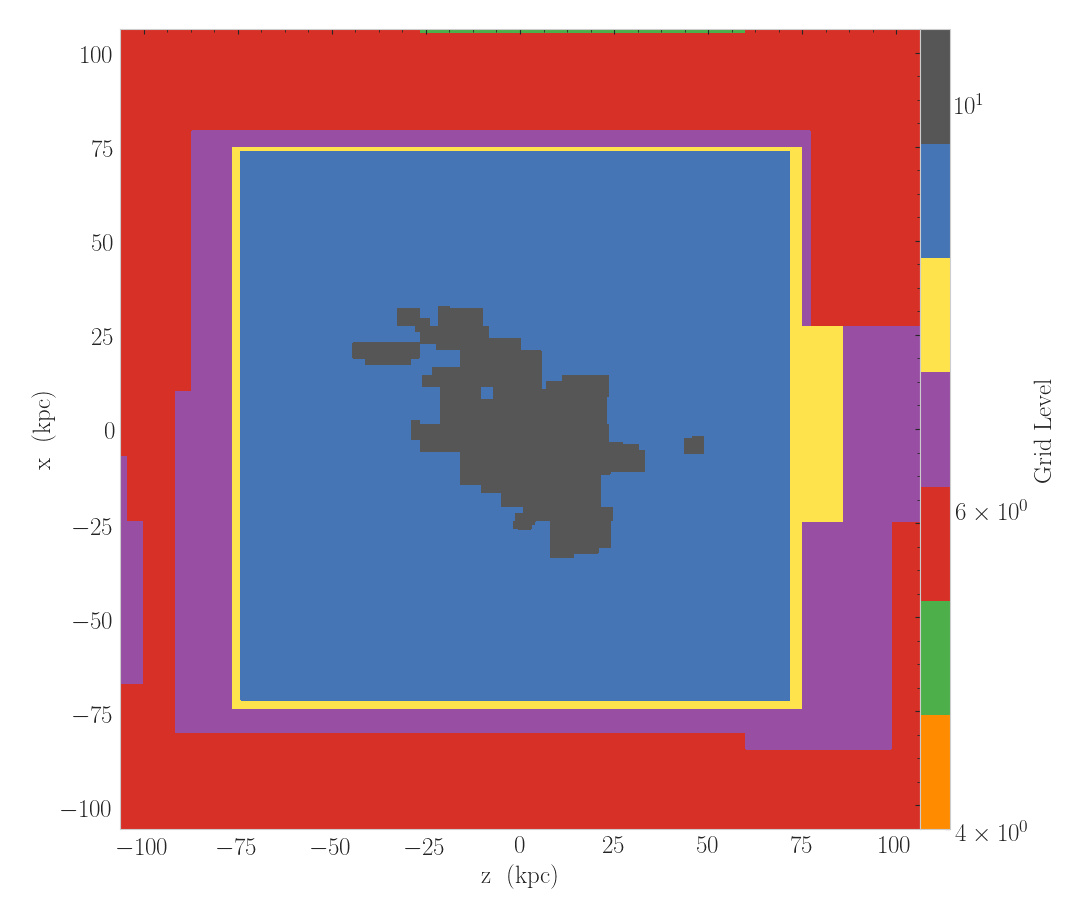

In [28]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

print(np.unique(refine_box['dy']) * 1000*(100/.68)/(1+2.))
#s = yt.SlicePlot(ds, "y", 'dy', center=center, width=1.5*refine_width)
s = yt.SlicePlot(ds, "y", ('index', 'grid_level'), center=center, width=1.5*refine_width)
# s.set_cmap(('index','grid_level'),"tab20b")
# s.set_cmap('dy', discrete_cmap)
# s.set_unit('dy','kpc')
s.set_cmap(('index','grid_level'), discrete_cmap)
s.set_zlim(('index','grid_level'),4,11)
#plot = s.plots['dy']
#s._setup_plots()
#colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
#colorbar.set_label('grid level')
s.show()

yt : [INFO     ] 2018-12-12 11:41:21,869 xlim = 0.501527 0.507527
yt : [INFO     ] 2018-12-12 11:41:21,870 ylim = 0.489534 0.495534
yt : [INFO     ] 2018-12-12 11:41:21,872 xlim = 0.501527 0.507527
yt : [INFO     ] 2018-12-12 11:41:21,872 ylim = 0.489534 0.495534
yt : [INFO     ] 2018-12-12 11:41:21,874 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



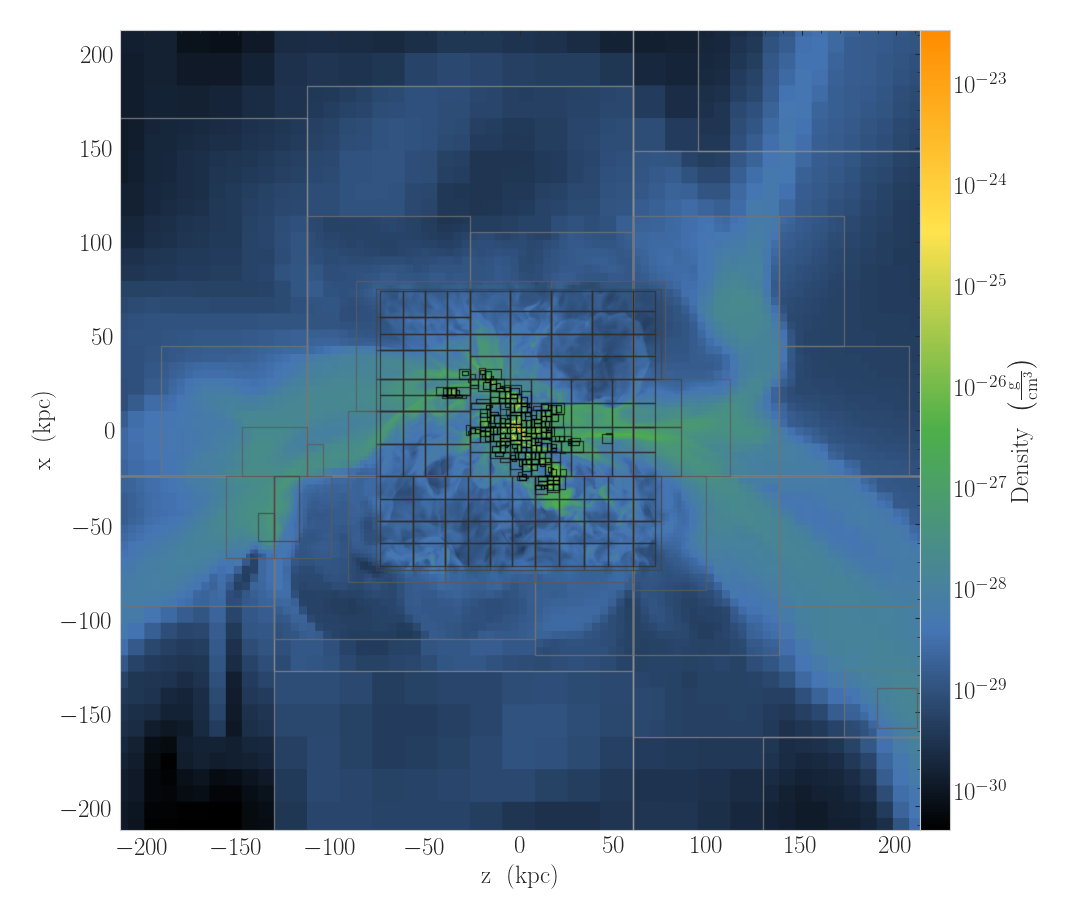

In [39]:
ad = ds.all_data()
s = yt.SlicePlot(ds, "y", 'density', center=center, width=3*refine_width)
s.set_cmap(('density'), density_color_map)
s.annotate_grids()
s.show()


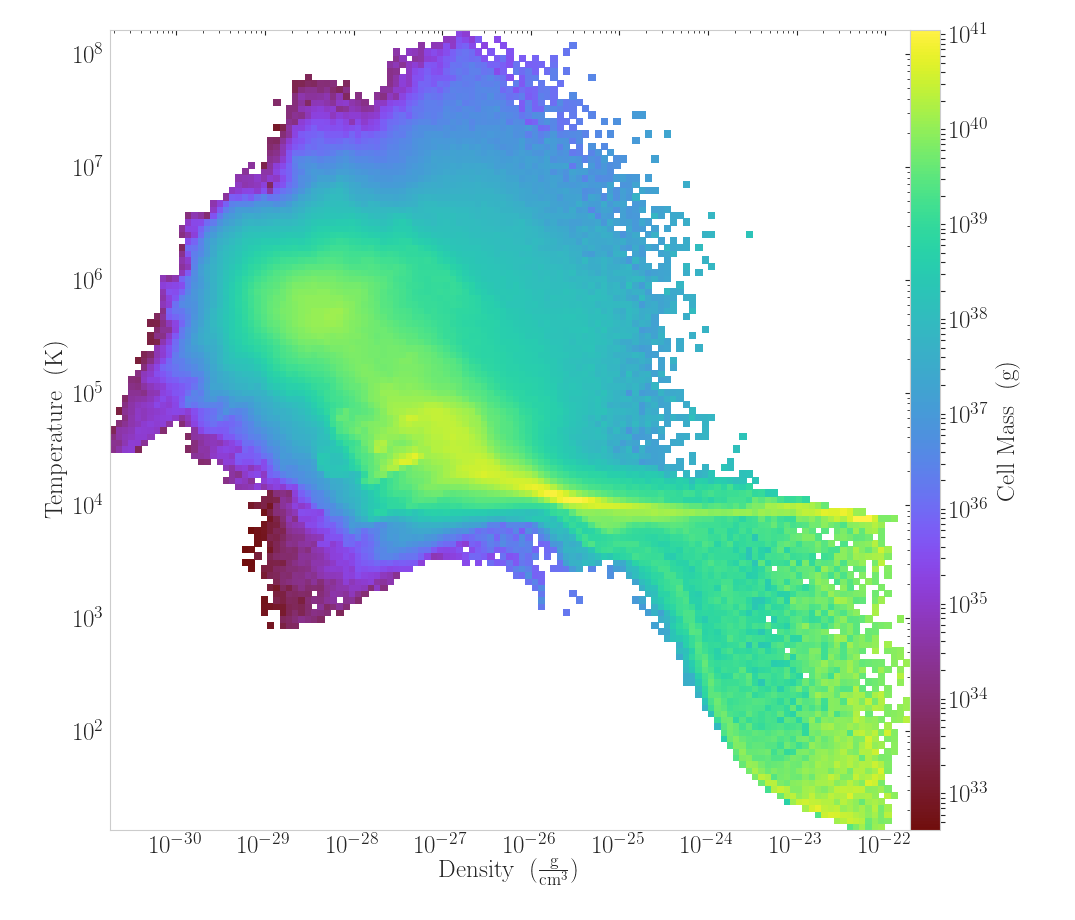

In [30]:
plot = yt.PhasePlot(refine_box, "density", "temperature", ["cell_mass"], weight_field=None)
plot.show()


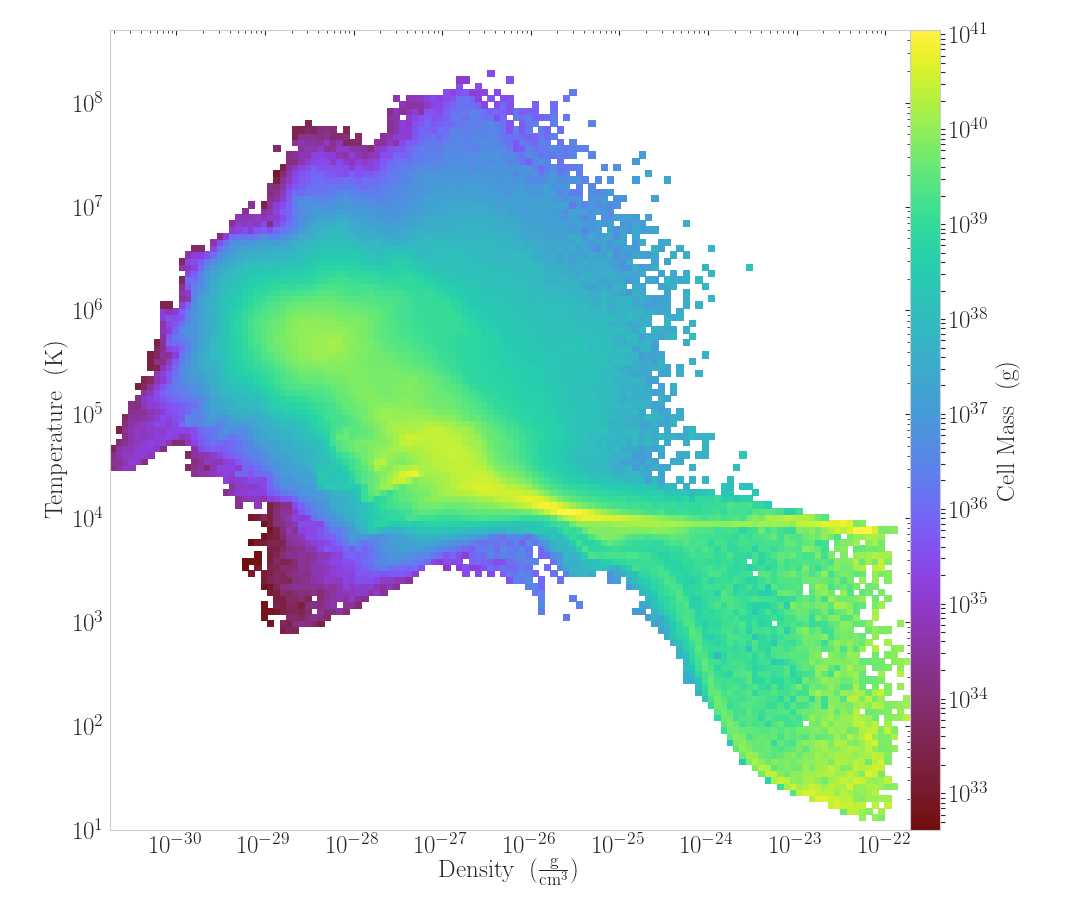

In [31]:
plot.set_ylim(1e1, 5e8)

In [18]:
ds.derived_field_list

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_cylindrical_velocity_theta'),
 ('all', 'particle_cylindrical_velocity_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('al


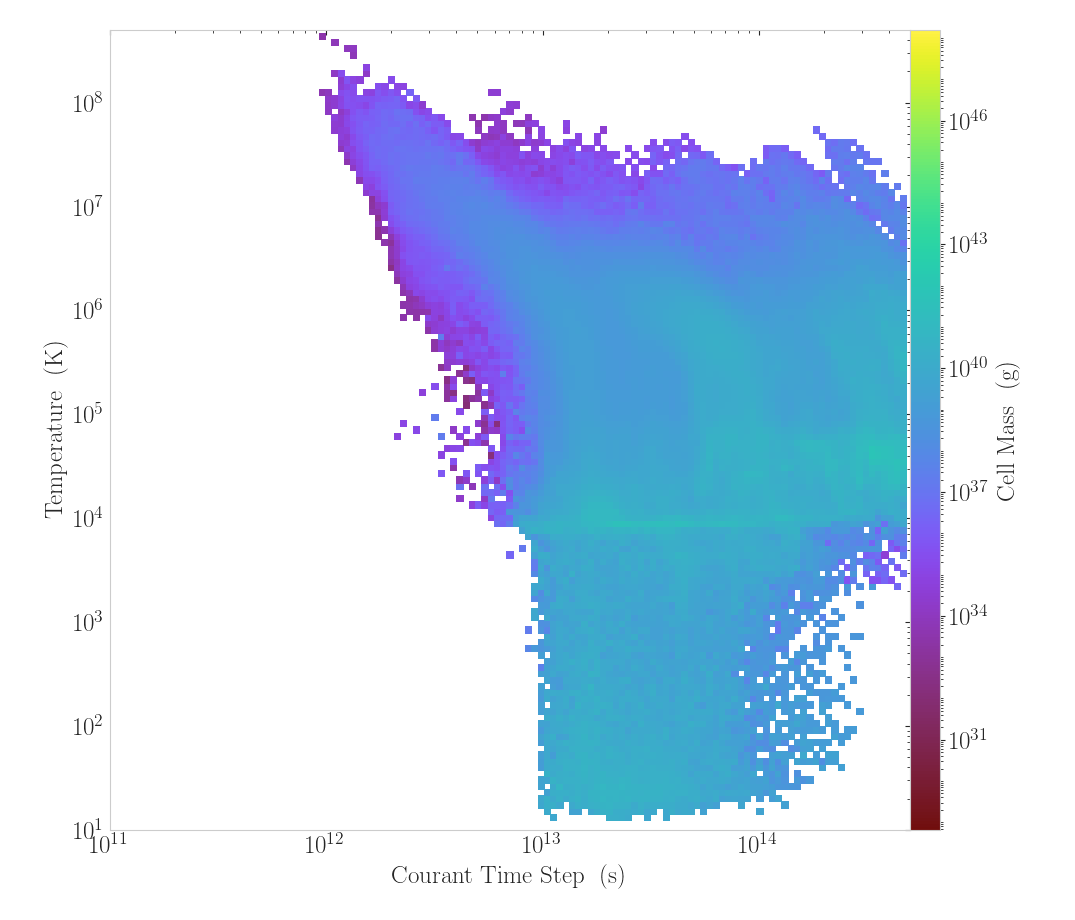

In [38]:
plot = yt.PhasePlot(ad, "courant_time_step", "temperature", ["cell_mass"], weight_field=None)
plot.set_ylim(1e1, 5e8)
plot.set_xlim(1e11, 5e14)

plot.show()

In [35]:
np.log10(173436736.75672424)

8.239141093606678

In [34]:
print(min(refine_box['courant_time_step'].to('yr')), max(refine_box['temperature']))

35405.09273486689 yr 173436736.75672424 K


In [47]:
min_dt = 1290022998238.9646*u.s
print(min_dt.to('yr'))

min_temp = 214823698.02701288
print(np.log10(min_temp))


40878.36205031322 yr
8.332082188362119


In [42]:
# ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/natural/RD0012/RD0012")
dsc = yt.load('/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/RD0020/RD0020')
# track_name = "/Users/molly/Dropbox/foggie/foggie/halo_tracks/nref11n_selfshield_15/halo_track_200kpc_nref10"
track_name = '/Users/molly/Dropbox/foggie/foggie/halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref10'
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = dsc.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(dsc)

refine_box_c, refine_box_center, refine_width = get_refine_box(dsc, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
centerc, velocity = get_halo_center(dsc, refine_box_center)


yt : [INFO     ] 2018-12-12 13:15:03,031 Parameters: current_time              = 154.80103271343
yt : [INFO     ] 2018-12-12 13:15:03,032 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-12-12 13:15:03,034 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-12-12 13:15:03,035 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-12-12 13:15:03,037 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-12-12 13:15:03,038 Parameters: current_redshift          = 1.9999996880027
yt : [INFO     ] 2018-12-12 13:15:03,039 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-12-12 13:15:03,040 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-12-12 13:15:03,041 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :  32%|███▏      | 2367/7348 [00:00<00:00, 23668.61it/s]

opening track: /Users/molly/Dropbox/foggie/foggie/halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref10
inside get_refine_box 1.9999996880027
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99979384142 0.493035 0.487894 0.501194 0.495035 0.489894 0.503194   10
get_halo_centers:  code_length code_velocity


Parsing Hierarchy : 100%|██████████| 7348/7348 [00:00<00:00, 14964.25it/s]
yt : [INFO     ] 2018-12-12 13:15:04,009 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f


Located the main halo at: [0.49404048919677734, 0.48891162872314453, 0.5021963119506836] [-0.0007773376207113362 code_velocity, -0.0005269751543635403 code_velocity, 0.0004101766455259306 code_velocity]



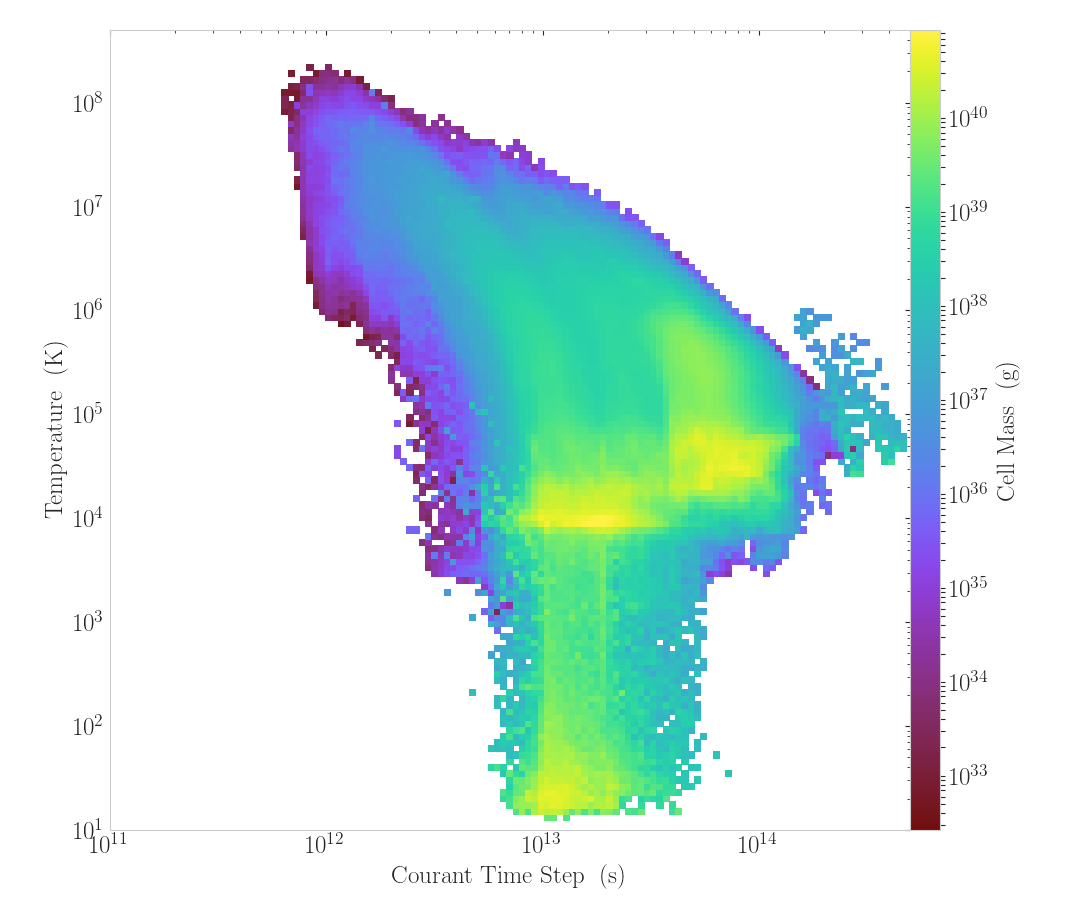

In [43]:
plot = yt.PhasePlot(refine_box_c, "courant_time_step", "temperature", ["cell_mass"], weight_field=None)
plot.set_ylim(1e1, 5e8)
plot.set_xlim(1e11, 5e14)

plot.show()

In [44]:
print(min(refine_box_c['courant_time_step'].to('yr')), max(refine_box_c['temperature']))

19408.567589683204 yr 214823698.02701288 K


In [11]:
ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/RD0014/RD0014")
track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-06-05 14:06:44,450 Parameters: current_time              = 72.7890686357
yt : [INFO     ] 2018-06-05 14:06:44,451 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-05 14:06:44,452 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-06-05 14:06:44,453 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-06-05 14:06:44,454 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-05 14:06:44,455 Parameters: current_redshift          = 3.99999897423
yt : [INFO     ] 2018-06-05 14:06:44,456 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-06-05 14:06:44,457 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-06-05 14:06:44,458 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :  37%|███▋      | 2915/7984 [00:00<00:00, 29148.85it/s]

opening track: /astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11c_nref9f_selfshield_z6/halo_track
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
4.04999996364 0.494576 0.493213 0.498535 0.496576 0.495213 0.500535     9)


Parsing Hierarchy : 100%|██████████| 7984/7984 [00:00<00:00, 28729.98it/s]
yt : [INFO     ] 2018-06-05 14:06:45,328 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49541378021240234, 0.49414348602294922, 0.49955463409423828]


yt : [INFO     ] 2018-06-07 09:47:49,766 xlim = 0.496827 0.499827
yt : [INFO     ] 2018-06-07 09:47:49,767 ylim = 0.495118 0.498118
yt : [INFO     ] 2018-06-07 09:47:49,768 xlim = 0.496827 0.499827
yt : [INFO     ] 2018-06-07 09:47:49,769 ylim = 0.495118 0.498118
yt : [INFO     ] 2018-06-07 09:47:49,772 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



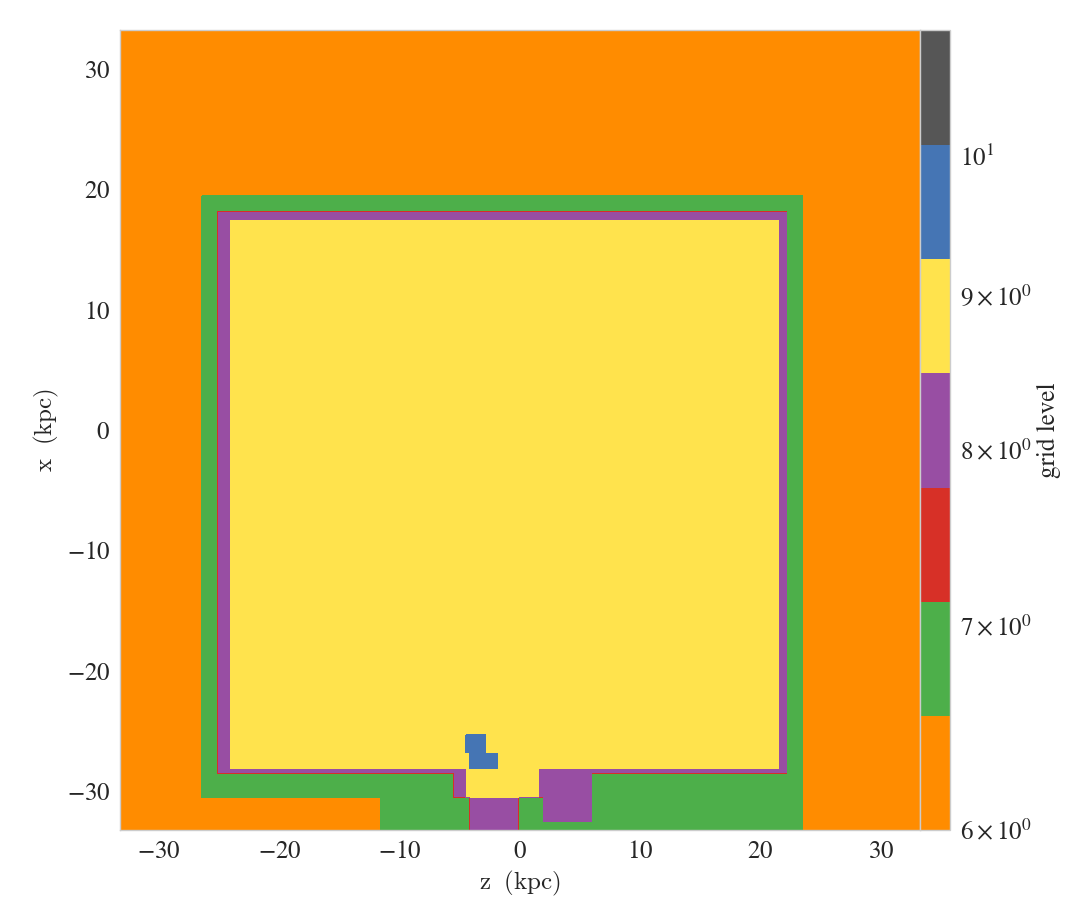

In [13]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

s = yt.SlicePlot(ds, "y", ('index','grid_level'), center=refine_box_center, width=1.5*refine_width)
s.set_cmap(('index','grid_level'),discrete_cmap)
# s.set_cmap('dy', discrete_cmap)
# s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
s.set_zlim(('index','grid_level'),6,11)
plot = s.plots[('index', 'grid_level')]
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('grid level')
# s.save('RD0014_nref11c_nref9f_selfshield_z6_grid_level.png')
s.show()

In [14]:
ds = yt.load("/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/DD0052/DD0052")
track_name = "/astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/halo_track"
print("opening track: " + track_name)
track = Table.read(track_name, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
proper_box_size = get_proper_box_size(ds)

refine_box, refine_box_center, refine_width = get_refine_box(ds, zsnap, track)
# refine_width = refine_width * proper_box_size

# center is trying to be the center of the halo
center, velocity = get_halo_center(ds, refine_box_center)


yt : [INFO     ] 2018-06-07 09:57:57,467 Parameters: current_time              = 46.0665278183
yt : [INFO     ] 2018-06-07 09:57:57,468 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-06-07 09:57:57,470 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-06-07 09:57:57,471 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-06-07 09:57:57,472 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-06-07 09:57:57,473 Parameters: current_redshift          = 5.79203476016
yt : [INFO     ] 2018-06-07 09:57:57,474 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-06-07 09:57:57,475 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-06-07 09:57:57,475 Parameters: hubble_constant           = 0.695
Parsing Hierarchy : 100%|██████████| 4053/4053 [00:00<00:00, 29657.78it/s]


opening track: /astro/simulations/FOGGIE/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/halo_track
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
5.79999996364 0.494206 0.496334 0.496968 0.496206 0.498334 0.498968    10)


yt : [INFO     ] 2018-06-07 09:57:57,981 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49573040008544922, 0.49596309661865234, 0.49886035919189453]


yt : [INFO     ] 2018-06-07 10:00:18,600 xlim = 0.493968 0.501968
yt : [INFO     ] 2018-06-07 10:00:18,600 ylim = 0.491206 0.499206
yt : [INFO     ] 2018-06-07 10:00:18,602 xlim = 0.493968 0.501968
yt : [INFO     ] 2018-06-07 10:00:18,603 ylim = 0.491206 0.499206
yt : [INFO     ] 2018-06-07 10:00:18,605 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



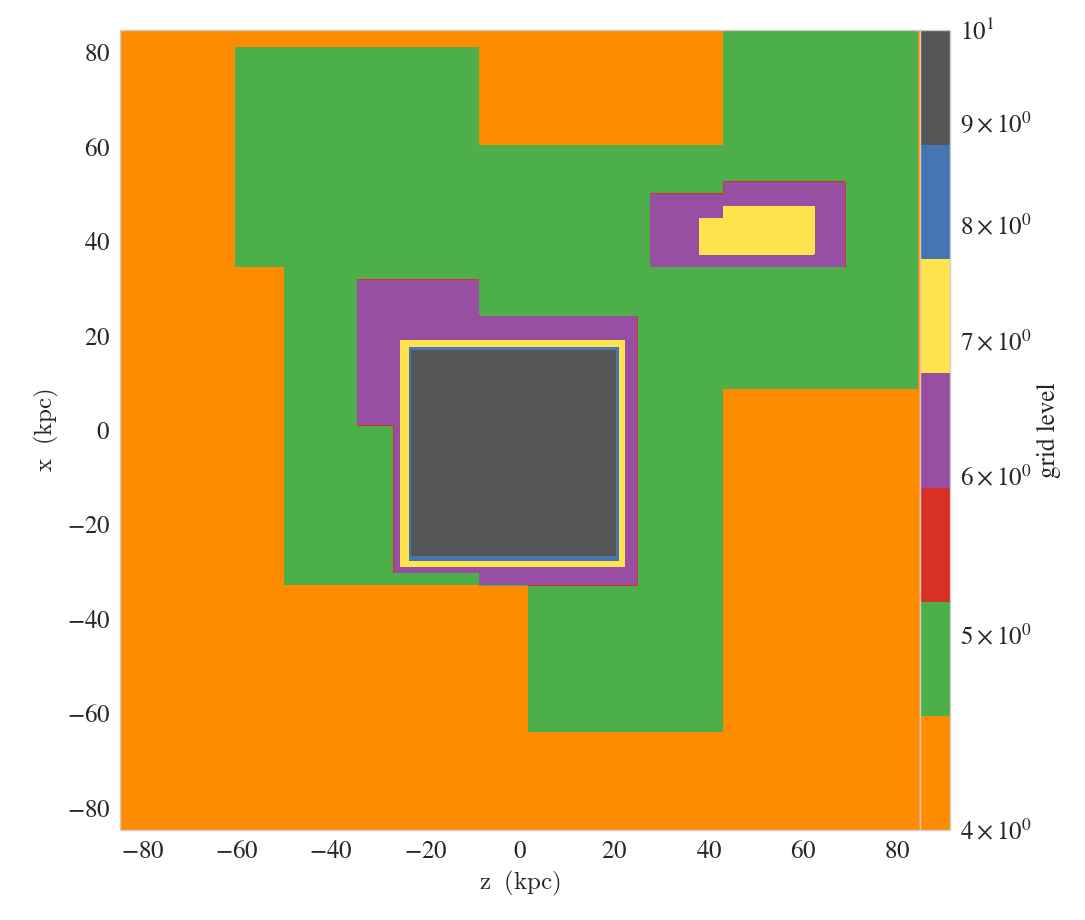

In [17]:
discrete_cmap = mpl.colors.ListedColormap(['darkorange','#4daf4a',"#d73027","#984ea3","#ffe34d",'#4575b4','#565656'])

s = yt.SlicePlot(ds, "y", ('index','grid_level'), center=refine_box_center, width=4*refine_width)
s.set_cmap(('index','grid_level'),discrete_cmap)
# s.set_cmap('dy', discrete_cmap)
# s.set_unit('dy','kpc')
#s.set_cmap(('index','grid_level'), discrete_cmap)
#s.set_zlim(('index','grid_level'),6,11)
plot = s.plots[('index', 'grid_level')]
s._setup_plots()
colorbar = plot.cb
#colorbar.set_ticks([0.093, 2*0.093, 4*0.093, 8*0.093, 16*0.093])
#colorbar.set_ticklabels([0.093, 0.186, 0.374, 0.748, 1.496])
colorbar.set_label('grid level')
## s.save('RD0014_nref11n_selfshield_z15_grid_level.png')
s.show()